<a href="https://colab.research.google.com/github/Rabbia-Ijaz/TryItOut/blob/main/boxGen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from PIL import Image
import zipfile
import glob
from sklearn import tree
import pandas as pd
import  copy
import pickle

In [2]:
Zip = zipfile.ZipFile('drive/My Drive/DATA.zip','r')
Zip.extractall('/img')
Zip.close()

In [3]:
imgArr = []
csv_file = pd.read_csv("/img/DATA/collarTrainSet.csv")
for p in csv_file['edge_imgPath']:
  imgArr.append(cv.imread("/img/DATA/Collar/target/"+p[19:]).flatten())

Y = [csv_file['bbox_x1'].to_list(),csv_file['bbox_y1'].to_list(),
     csv_file['bbox_x2'].to_list(),csv_file['bbox_y2'].to_list() ]

Y = np.array(Y)
Y = np.transpose(Y)

In [ ]:
dtr = tree.DecisionTreeRegressor()
dtr.fit(imgArr[:5000], Y[:5000])
#print(imgArr[9].shape)
#plt.imshow(imgArr[44].reshape(256,256,3))

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [6]:
def plotBox(points):
  plt.plot([points[0],points[2]] , [points[1],points[1]])
  plt.plot([points[2],points[2]] , [points[1],points[3]])
  plt.plot([points[2],points[0]] , [points[3],points[3]])
  plt.plot([points[0],points[0]] , [points[3],points[1]])

Enter: 7419


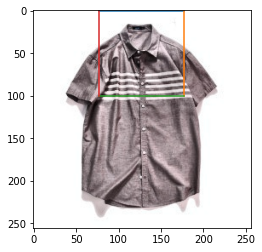

In [ ]:
num = input("Enter: ")
num = int(num)
#plt.imshow(imgArr[num].reshape(256,256))
pred = dtr.predict(imgArr[num:num+30])
for i in range(num,num+1):
  plt.imshow(imgArr[i].reshape(256,256,3))
  plotBox(pred[i-num])
  plt.show()

In [4]:
#file = open("model2.pkl",'wb')
#model = pickle.dump(dtr,file)

Enter: 7418


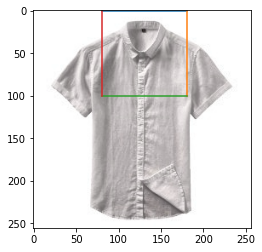

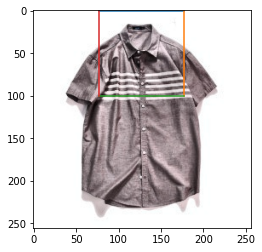

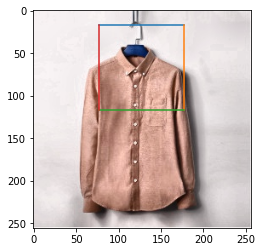

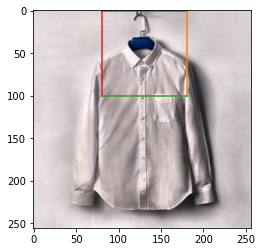

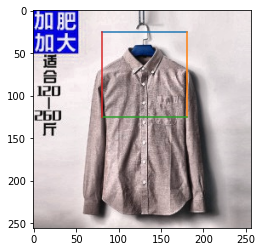

In [10]:
x = open("/content/sample_data/model2.pkl",'rb')
model = pickle.load(x)
x.close()


num = input("Enter: ")
num = int(num)
#plt.imshow(imgArr[num].reshape(256,256))
pred = model.predict(imgArr[num:num+5])
for i in range(num,num+5):
  plt.imshow(imgArr[i].reshape(256,256,3))
  plotBox(pred[i-num])
  plt.show()


In [180]:
#sleeves

In [83]:
imgArr = []
csv_file = pd.read_csv("/img/DATA/sleeveTrainSet.csv")
print (csv_file['edge_path'][0][17:])
for p in csv_file['edge_path']:
  imgArr.append(cv.imread("/img/DATA/Sleeve/target"+p[17:]).flatten())

sleeveCords = [csv_file['shoulder1_x'].to_list(), csv_file['shoulder1_y'].to_list(),
               csv_file['sleeve1_x'].to_list(), csv_file['sleeve1_y'].to_list(),
               csv_file['shoulder2_x'].to_list(), csv_file['shoulder2_y'].to_list(),
               csv_file['sleeve2_x'].to_list(), csv_file['sleeve2_y'].to_list()]

orgDim = [csv_file['orig_H'].to_list(), csv_file['orig_W'].to_list()]

sleeveCords = np.array(sleeveCords)
sleeveCords = np.transpose(sleeveCords)
orgDim = np.array(orgDim)
orgDim = np.transpose(orgDim)

/2159552703_566644455566-00002.jpg


In [181]:
newCords = np.full_like(sleeveCords,1)
for i in range(len(sleeveCords)):
  newCords[i][0::2] = [x*(256/orgDim[i][1]) for x in sleeveCords[i][0::2]]
  newCords[i][1::2] = [x*(256/orgDim[i][0]) for x in sleeveCords[i][1::2]]
  newCords[i][0]+=abs(int((newCords[i][2]-newCords[i][0])/2))
  newCords[i][4]-=abs(int((newCords[i][6]-newCords[i][4])/2))
  newCords[i][2]-=abs(int((newCords[i][2]-newCords[i][0])/2))
  newCords[i][6]+=abs(int((newCords[i][6]-newCords[i][4])/2))
  newCords[i][1]-=15
  newCords[i][5]-=15
  newCords[i][1]*=(newCords[i][1] > 0)
  newCords[i][5]*=(newCords[i][1] > 0)
  newCords[i][3] = newCords[i][7] = 255

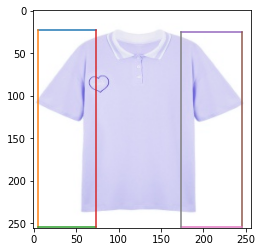

In [183]:
x = 5488
plt.imshow(imgArr[x].reshape(256,256,3))
plotBox(newCords[x][:4])
plotBox(newCords[x][4:])

In [185]:
sleeveModel = DecisionTreeRegressor()
sleeveModel.fit(imgArr[:4500],newCords[:4500])

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [11]:
fil = open("/content/sample_data/sleeveModel.pkl","rb")
sModel = pickle.load(fil)
fil.close()

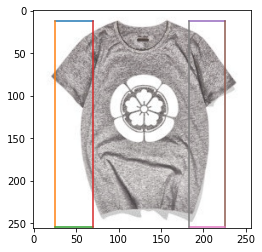

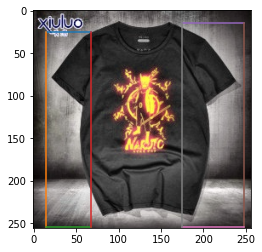

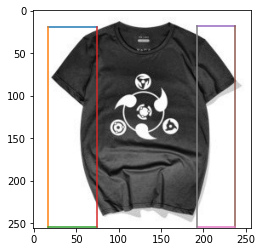

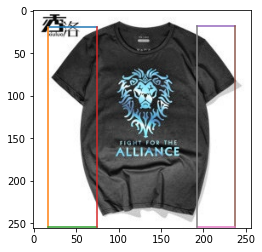

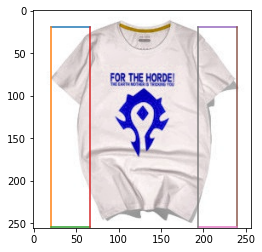

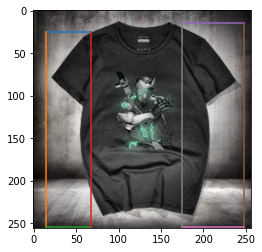

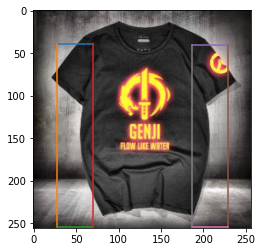

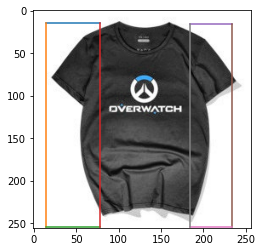

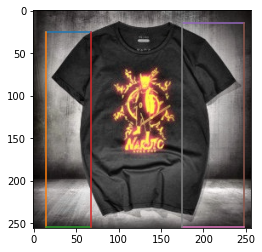

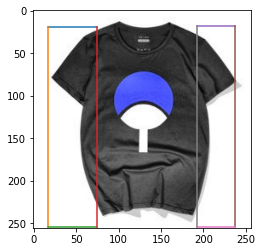

In [13]:
x = 5144
preds = sModel.predict(imgArr[x:x+10])
for i in range(x,x+10):
  plt.imshow(imgArr[i].reshape(256,256,3))
  plotBox(preds[i-x][:4])
  plotBox(preds[i-x][4:])
  plt.show()